在此 Colab 中，我们将编写一个完整的 pipeline 来学习 node 嵌入。我们将完成以下 3 个步骤。

首先，我们将加载网络科学中的一个经典图，即 Karate Club Network。我们将探索该图的多个图形统计信息。

然后，我们将共同将图形结构转换为 PyTorch 张量，以便我们可以对图形执行机器学习。

最后，我们将完成第一个图学习算法：节点嵌入模型。为简单起见，我们这里的模型比讲座中讲授的 DeepWalk / node2vec 算法更简单。但它仍然很有意义和挑战，因为我们将通过 PyTorch 从头开始编写它。

# 1 Graph Basics

In [1]:
import networkx as nx
G = nx.karate_club_graph()

# G is an undirected graph
type(G)

networkx.classes.graph.Graph

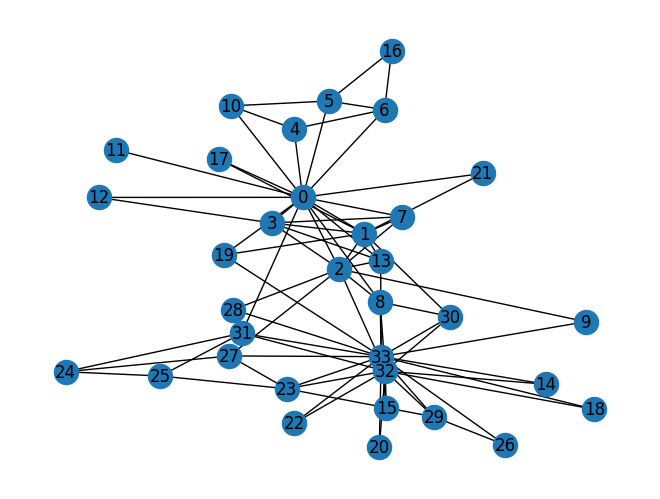

In [2]:
# Visualize the graph
nx.draw(G, with_labels = True)

## 问题 1：空手道社网络的平均程度是多少？（5 分）

In [4]:
def average_degree(num_edges, num_nodes):
  # TODO: Implement this function that takes number of edges
  # and number of nodes, and returns the average node degree of
  # the graph. Round the result to nearest integer (for example
  # 3.3 will be rounded to 3 and 3.7 will be rounded to 4)

  avg_degree = 0

  ############# Your code here ############
  avg_degree = 2*num_edges/num_nodes

  #########################################

  return avg_degree

num_edges = G.number_of_edges()
num_nodes = G.number_of_nodes()
avg_degree = average_degree(num_edges, num_nodes)
print("Average degree of karate club network is {}".format(avg_degree))

Average degree of karate club network is 4.588235294117647


## 问题 2：空手道社网络的平均聚类系数是多少？（5 分）

In [5]:
def average_clustering_coefficient(G):
  # TODO: Implement this function that takes a nx.Graph
  # and returns the average clustering coefficient. Round
  # the result to 2 decimal places (for example 3.333 will
  # be rounded to 3.33 and 3.7571 will be rounded to 3.76)

  avg_cluster_coef = 0

  ############# Your code here ############
  ## Note:
  ## 1: Please use the appropriate NetworkX clustering function
  avg_cluster_coef = nx.average_clustering(G)

  #########################################

  return avg_cluster_coef

avg_cluster_coef = average_clustering_coefficient(G)
print("Average clustering coefficient of karate club network is {}".format(avg_cluster_coef))

Average clustering coefficient of karate club network is 0.5706384782076823


## 问题 3：在一次 PageRank 迭代后，节点 0（id 为 0 的节点）的 PageRank 值是多少？（5 分）

Page Rank 使用 Web 的链接结构来衡量图表中节点的重要性。来自重要页面的 “vote” 更有价值。具体来说，如果一个具有重要性的 $r_i$ 页面$i$ 有d个链接，则每个链接传递的重要性为$r_i/d$。这样，页面$j$的重要性可以定义为所有链接页面$j$传递的重要性之和。这个过程可以通过以下公式表示：
$$ r_j = \sum_{i \rightarrow j} \frac{r_i}{d_i} $$

PageRank 算法（由 Google 使用）输出概率分布，该分布表示随机冲浪者点击链接到达任何特定页面的可能性。在每个时间步长，随机冲浪者有两个选项
1. 以概率 $\beta$ 随机点击一个链接
2. 以概率 $1-\beta$ 随机跳转到任何随机页面

因此，特定页面的 PageRank 值可以通过以下公式计算：
$$ r_j = \beta \sum_{i \rightarrow j} \frac{r_i}{d_i} + (1-\beta) \frac{1}{N} $$

请通过为节点 0 实现上述 PageRank 方程来完成代码块。

In [13]:
def one_iter_pagerank(G, beta, r0, node_id):
    # TODO: Implement this function that takes a nx.Graph, beta, r0 and node id.
    # The return value r1 is one interation PageRank value for the input node.
    # Please round r1 to 2 decimal places.

    r1 = 0
    
    ############# Your code here ############
    ## Note:
    ## 1: You should not use nx.pagerank
    for i in nx.neighbors(G, node_id):
      degree = G.degree(i)
      r1 += r0 / degree * beta
    r1 += (1 - beta) / G.number_of_nodes()
    r1 = round(r1, 2)
    
    #########################################
    r1_nx = nx.pagerank(G, alpha=beta, max_iter=500)[node_id]
    return r1, r1_nx

beta = 0.8
r0 = 1 / G.number_of_nodes()
node = 0
r1 ,r1_nx= one_iter_pagerank(G, beta, r0, node)
print(f"The PageRank value for node 0 after one iteration is {r1}, and the value calculated by nx is {r1_nx}")

The PageRank value for node 0 after one iteration is 0.13, and the value calculated by nx is 0.08681447719172829


## Question 4: What is the (raw) closeness centrality for the karate club network node 5? (5 Points)

In [13]:
def closeness_centrality(G, node=5):
  # TODO: Implement the function that calculates closeness centrality
  # for a node in karate club network. G is the input karate club
  # network and node is the node id in the graph. Please round the
  # closeness centrality result to 2 decimal places.

  closeness = 0

  ## Note:
  ## 1: You can use networkx closeness centrality function.
  ## 2: Notice that networkx closeness centrality returns the normalized
  ## closeness directly, which is different from the raw (unnormalized)
  ## one that we learned in the lecture.

  ############# Your code here ############

  #########################################

  return closeness

node = 5
closeness = closeness_centrality(G, node=node)
print("The node 5 has closeness centrality {}".format(closeness))

In [21]:
# 计算节点 5 的 closeness centrality
# 首先closer centrality的定义是节点到其他节点的距离之和的倒数，所以我们需要计算节点 5 到其他节点的最短路径长度
# 找出节点 5 到其他节点的最短路径长度
# 代码
node = 5
shortest_path_lengths = nx.single_source_shortest_path_length(G, node)
# 求出节点 5 到其他节点的最短路径长度的平均值
sum_shortest_path_lengths = sum(shortest_path_lengths.values())
closeness = 1 / sum_shortest_path_lengths
closeness

0.011627906976744186

# 2 Graph to Tensor
We will then work together to transform the graph  G  into a PyTorch tensor, so that we can perform machine learning over the graph.
## Question 5: Get the edge list of the karate club network and transform it into torch.LongTensor. What is the torch.sum value of pos_edge_index tensor? (10 Points)

In [22]:
import torch
print(torch.__version__)

2.4.1+cu121


In [52]:
def graph_to_edge_list(G):
    # TODO: Implement the function that returns the edge list of
    # an nx.Graph. The returned edge_list should be a list of tuples
    # where each tuple is a tuple representing an edge connected
    # by two nodes.
  
    edge_list = []
  
    ############# Your code here ############
    for edge in G.edges():
      edge_list.append(edge)
    #########################################
  
    return edge_list

def edge_list_to_tensor(edge_list):
    # TODO: Implement the function that transforms the edge_list to
    # tensor. The input edge_list is a list of tuples and the resulting
    # tensor should have the shape [2, len(edge_list)].
  
    edge_index = torch.tensor([])
  
    ############# Your code here ############
    edge_index = torch.tensor(edge_list).t()
    #########################################
  
    return edge_index
  
pos_edge_list = graph_to_edge_list(G)
print(pos_edge_list)
pos_edge_index = edge_list_to_tensor(pos_edge_list)
print("The pos_edge_index tensor has shape {}".format(pos_edge_index.shape))
print("The pos_edge_index tensor has sum value {}".format(torch.sum(pos_edge_index)))

[(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 10), (0, 11), (0, 12), (0, 13), (0, 17), (0, 19), (0, 21), (0, 31), (1, 2), (1, 3), (1, 7), (1, 13), (1, 17), (1, 19), (1, 21), (1, 30), (2, 3), (2, 7), (2, 8), (2, 9), (2, 13), (2, 27), (2, 28), (2, 32), (3, 7), (3, 12), (3, 13), (4, 6), (4, 10), (5, 6), (5, 10), (5, 16), (6, 16), (8, 30), (8, 32), (8, 33), (9, 33), (13, 33), (14, 32), (14, 33), (15, 32), (15, 33), (18, 32), (18, 33), (19, 33), (20, 32), (20, 33), (22, 32), (22, 33), (23, 25), (23, 27), (23, 29), (23, 32), (23, 33), (24, 25), (24, 27), (24, 31), (25, 31), (26, 29), (26, 33), (27, 33), (28, 31), (28, 33), (29, 32), (29, 33), (30, 32), (30, 33), (31, 32), (31, 33), (32, 33)]
The pos_edge_index tensor has shape torch.Size([2, 78])
The pos_edge_index tensor has sum value 2535


## Question 6: Please implement following function that samples negative edges. Then answer which edges (edge_1 to edge_5) are the negative edges in the karate club network? (10 Points)
“负”边是指图形中不存在的边/链接。术语 “负 ” 是从链接预测中的 “负采样 ”借用的。它与边缘权重无关。

例如，给定一条边 （src， dst），您应该检查 （src， dst） 和 （dst， src） 都不是 Graph 中的边。如果这些都成立，那么它是负边。

In [31]:
import random

def sample_negative_edges(G, num_neg_samples):
    # TODO: Implement the function that returns a list of negative edges.
    # The number of sampled negative edges is num_neg_samples. You do not
    # need to consider the corner case when the number of possible negative edges
    # is less than num_neg_samples. It should be ok as long as your implementation
    # works on the karate club network. In this implementation, self loops should
    # not be considered as either a positive or negative edge. Also, notice that
    # the karate club network is an undirected graph, if (0, 1) is a positive
    # edge, do you think (1, 0) can be a negative one?
    
    neg_edge_list = []
    
    ############# Your code here ############
    non_edges_one_side=list(enumerate(nx.non_edges(G)))
    # 采样
    neg_edge_list=random.sample(non_edges_one_side,num_neg_samples)
    # 转换为数组
    neg_edge_list = [x[1] for x in neg_edge_list]
    print(neg_edge_list)
    
    #########################################
    
    return neg_edge_list

# Sample 78 negative edges
neg_edge_list = sample_negative_edges(G, len(pos_edge_list))

# Transform the negative edge list to tensor
neg_edge_index = edge_list_to_tensor(neg_edge_list)
print("The neg_edge_index tensor has shape {}".format(neg_edge_index.shape))

# Which of following edges can be negative ones?
edge_1 = (7, 1)
edge_2 = (1, 33)
edge_3 = (33, 22)
edge_4 = (0, 4)
edge_5 = (4, 2)

def can_be_negative(G, edge):
  # TODO: Implement the function that tests if an edge is a negative
  # edge in graph G.

  is_negative = False

  ############# Your code here ############
  if not G.has_edge(edge[0], edge[1]) and not G.has_edge(edge[1], edge[0]):
    is_negative = True

  #########################################

  return is_negative

print(f"Edge 1 can be a negative edge: {can_be_negative(G, edge_1)}")
print(f"Edge 2 can be a negative edge: {can_be_negative(G, edge_2)}")
print(f"Edge 3 can be a negative edge: {can_be_negative(G, edge_3)}")
print(f"Edge 4 can be a negative edge: {can_be_negative(G, edge_4)}")
print(f"Edge 5 can be a negative edge: {can_be_negative(G, edge_5)}")

[(1, 18), (10, 19), (21, 29), (2, 21), (17, 22), (7, 13), (10, 15), (11, 28), (16, 27), (0, 24), (4, 29), (0, 22), (2, 16), (7, 10), (13, 17), (1, 23), (4, 12), (18, 31), (15, 31), (19, 30), (9, 22), (12, 23), (14, 21), (3, 16), (10, 13), (3, 6), (30, 31), (20, 23), (18, 28), (1, 29), (6, 17), (17, 32), (4, 19), (3, 11), (16, 28), (3, 8), (9, 30), (28, 32), (3, 18), (11, 24), (13, 29), (3, 24), (6, 20), (27, 29), (12, 29), (19, 27), (14, 29), (14, 17), (6, 11), (0, 30), (12, 16), (6, 12), (5, 29), (2, 22), (15, 28), (6, 7), (11, 20), (8, 9), (9, 26), (8, 13), (9, 15), (10, 28), (15, 27), (25, 33), (12, 19), (2, 10), (11, 23), (18, 29), (18, 26), (12, 13), (8, 15), (3, 22), (20, 26), (11, 25), (8, 25), (11, 12), (2, 20), (20, 21)]
The neg_edge_index tensor has shape torch.Size([2, 78])
Edge 1 can be a negative edge: False
Edge 2 can be a negative edge: True
Edge 3 can be a negative edge: False
Edge 4 can be a negative edge: False
Edge 5 can be a negative edge: True


# 3 Node Embedding

In [33]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
# pip install scikit-learn
from sklearn.decomposition import PCA

In [40]:

emb_sample = nn.Embedding(num_embeddings=4, embedding_dim=8)
print('Sample embedding layer: {}'.format(emb_sample))

Sample embedding layer: Embedding(4, 8)


In [41]:
# Select an embedding in emb_sample
id = torch.LongTensor([1])
print(id)
print(emb_sample(id))

print("==================")
# Select multiple embeddings
ids = torch.LongTensor([1, 3])
print(ids)
print(emb_sample(ids))

# Get the shape of the embedding weight matrix
shape = emb_sample.weight.data.shape
print(shape)

# Overwrite the weight to tensor with all ones
emb_sample.weight.data = torch.ones(shape)

# Let's check if the emb is indeed initilized
ids = torch.LongTensor([0, 3])
print(emb_sample(ids))

tensor([1])
tensor([[-1.9833, -0.9649,  0.4274,  0.2227, -0.8763, -0.7236,  0.1466, -0.4890]],
       grad_fn=<EmbeddingBackward0>)
tensor([1, 3])
tensor([[-1.9833, -0.9649,  0.4274,  0.2227, -0.8763, -0.7236,  0.1466, -0.4890],
        [-1.1050,  0.7443, -0.2178, -1.5039, -0.6505, -0.3968, -1.1166,  0.0145]],
       grad_fn=<EmbeddingBackward0>)
torch.Size([4, 8])
tensor([[1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1.]], grad_fn=<EmbeddingBackward0>)


现在，是时候为我们拥有的图形创建节点嵌入矩阵了！

我们希望空手道俱乐部网络中的每个节点都有 16 维向量。

In [46]:
# Please do not change / reset the random seed
torch.manual_seed(1)

def create_node_emb(num_node=34, embedding_dim=16):
    # TODO: Implement this function that will create the node embedding matrix.
    # A torch.nn.Embedding layer will be returned. You do not need to change
    # the values of num_node and embedding_dim. The weight matrix of returned
    # layer should be initialized under uniform distribution.
  
    emb = None
  
    ############# Your code here ############
    emb = nn.Embedding(num_embeddings=num_node, embedding_dim=embedding_dim)
    emb.weight.data = torch.rand(num_node, embedding_dim)
    #########################################
  
    return emb

emb = create_node_emb()
ids = torch.LongTensor([0, 3])
print(ids)

# Print the embedding layer
print("Embedding: {}".format(emb))

# An example that gets the embeddings for node 0 and 3
print(emb(ids))

tensor([0, 3])
Embedding: Embedding(34, 16)
tensor([[0.2114, 0.7335, 0.1433, 0.9647, 0.2933, 0.7951, 0.5170, 0.2801, 0.8339,
         0.1185, 0.2355, 0.5599, 0.8966, 0.2858, 0.1955, 0.1808],
        [0.7486, 0.6546, 0.3843, 0.9820, 0.6012, 0.3710, 0.4929, 0.9915, 0.8358,
         0.4629, 0.9902, 0.7196, 0.2338, 0.0450, 0.7906, 0.9689]],
       grad_fn=<EmbeddingBackward0>)


In [47]:
ids.shape

torch.Size([2])

## 可视化节点嵌入

In [50]:
for node in G.nodes(data=True):
    print(node)

(0, {'club': 'Mr. Hi'})
(1, {'club': 'Mr. Hi'})
(2, {'club': 'Mr. Hi'})
(3, {'club': 'Mr. Hi'})
(4, {'club': 'Mr. Hi'})
(5, {'club': 'Mr. Hi'})
(6, {'club': 'Mr. Hi'})
(7, {'club': 'Mr. Hi'})
(8, {'club': 'Mr. Hi'})
(9, {'club': 'Officer'})
(10, {'club': 'Mr. Hi'})
(11, {'club': 'Mr. Hi'})
(12, {'club': 'Mr. Hi'})
(13, {'club': 'Mr. Hi'})
(14, {'club': 'Officer'})
(15, {'club': 'Officer'})
(16, {'club': 'Mr. Hi'})
(17, {'club': 'Mr. Hi'})
(18, {'club': 'Officer'})
(19, {'club': 'Mr. Hi'})
(20, {'club': 'Officer'})
(21, {'club': 'Mr. Hi'})
(22, {'club': 'Officer'})
(23, {'club': 'Officer'})
(24, {'club': 'Officer'})
(25, {'club': 'Officer'})
(26, {'club': 'Officer'})
(27, {'club': 'Officer'})
(28, {'club': 'Officer'})
(29, {'club': 'Officer'})
(30, {'club': 'Officer'})
(31, {'club': 'Officer'})
(32, {'club': 'Officer'})
(33, {'club': 'Officer'})


Embedding shape:  (34, 16)


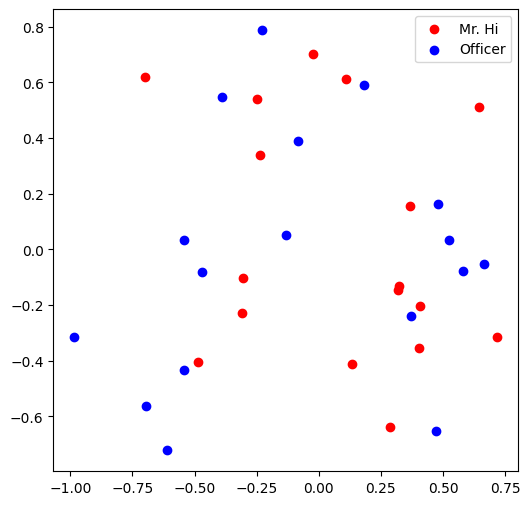

In [49]:
def visualize_emb(emb):
    X = emb.weight.data.numpy()
    print("Embedding shape: ", X.shape)
    pca = PCA(n_components=2)
    components = pca.fit_transform(X)
    plt.figure(figsize=(6, 6))
    club1_x = []
    club1_y = []
    club2_x = []
    club2_y = []
    for node in G.nodes(data=True):
      if node[1]['club'] == 'Mr. Hi':
        club1_x.append(components[node[0]][0])
        club1_y.append(components[node[0]][1])
      else:
        club2_x.append(components[node[0]][0])
        club2_y.append(components[node[0]][1])
    plt.scatter(club1_x, club1_y, color="red", label="Mr. Hi")
    plt.scatter(club2_x, club2_y, color="blue", label="Officer")
    plt.legend()
    plt.show()

# Visualize the initial random embeddding
visualize_emb(emb)

## Question 7: Training the embedding! What is the best performance you can get? (20 Points)
我们希望优化我们的嵌入，以便将边分类为正边或负边。给定一条边和每个节点的嵌入，嵌入的点积，后跟一个 sigmoid，应该给我们给出该边为正（sigmoid 输出 > 0.5）或负（sigmoid 输出 < 0.5）的可能性。
请注意，我们使用的是您在前面的问题中编写的函数，以及在前面的单元格中初始化的变量。如果您遇到问题，请确保您对问题 1-6 的回答正确无误。

In [123]:
from torch.optim import SGD
import torch.nn as nn
import time
torch.manual_seed(1234)

def accuracy(pred, label):
    # TODO: Implement the accuracy function. This function takes the
    # pred tensor (the resulting tensor after sigmoid) and the label
    # tensor (torch.LongTensor). Predicted value greater than 0.5 will
    # be classified as label 1. Else it will be classified as label 0.
    # The returned accuracy should be rounded to 4 decimal places.
    # For example, accuracy 0.82956 will be rounded to 0.8296.
    
    accu = 0.0
    
    ############# Your code here ############
    pred = (pred > 0.5).type(torch.LongTensor)
    accu = float(torch.sum(pred == label)) / len(label)
    accu = round(accu, 4)
    #########################################
    
    return accu

def train(emb, loss_fn, train_label, train_edge):
    # TODO: Train the embedding layer here. You can also change epochs and
    # learning rate. In general, you need to implement:
    # (1) Get the embeddings of the nodes in train_edge
    # (2) Dot product the embeddings between each node pair
    # (3) Feed the dot product result into sigmoid
    # (4) Feed the sigmoid output into the loss_fn
    # (5) Print both loss and accuracy of each epoch
    # (6) Update the embeddings using the loss and optimizer
    # (as a sanity check, the loss should decrease during training)
  
    epochs = 300
    learning_rate = 0.1
  
    optimizer = SGD(emb.parameters(), lr=learning_rate, momentum=0.9)
  
    for i in range(epochs):
        ############# Your code here ############

        train_node_emb = emb(train_edge)
        # print(f"emb:{train_node_emb.shape}")
        # 计算点积
        dot_product = train_node_emb[0] * train_node_emb[1]
        dot_product = torch.sum(dot_product, axis=-1)
        # print(f"dot_product:{dot_product.shape}")
        # sigmoid
        pred = sigmoid(dot_product)
        # loss
        loss = loss_fn(pred, train_label)
        # print(f"loss:{loss}")
        # accuracy
        accu = accuracy(pred, train_label)
        # print(f"accu:{accu}")
        # 更新
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        print(f"epoch:{i}, loss:{loss}, accu:{accu}")
            # visualize_emb(emb)
            # time.sleep(1)
        #########################################
    
    return emb

loss_fn = nn.BCELoss()
sigmoid = nn.Sigmoid()
print(pos_edge_index.shape) 

# Generate the positive and negative labels
pos_label = torch.ones(pos_edge_index.shape[1], )
neg_label = torch.zeros(neg_edge_index.shape[1], )

# Concat positive and negative labels into one tensor
train_label = torch.cat([pos_label, neg_label], dim=0)

# Concat positive and negative edges into one tensor
# Since the network is very small, we do not split the edges into val/test sets
train_edge = torch.cat([pos_edge_index, neg_edge_index], dim=1)
print(f"train_edge:{train_edge.shape}")
emb = create_node_emb()
emb = train(emb, loss_fn, train_label, train_edge)

torch.Size([2, 78])
train_edge:torch.Size([2, 156])
epoch:0, loss:1.9365314245224, accu:0.5
epoch:1, loss:1.9240509271621704, accu:0.5
epoch:2, loss:1.9005297422409058, accu:0.5
epoch:3, loss:1.8674224615097046, accu:0.5
epoch:4, loss:1.8261644840240479, accu:0.5
epoch:5, loss:1.778145670890808, accu:0.5
epoch:6, loss:1.7246932983398438, accu:0.5
epoch:7, loss:1.6670584678649902, accu:0.5
epoch:8, loss:1.6064046621322632, accu:0.5
epoch:9, loss:1.543802261352539, accu:0.5
epoch:10, loss:1.4802216291427612, accu:0.5
epoch:11, loss:1.4165297746658325, accu:0.5
epoch:12, loss:1.3534891605377197, accu:0.5
epoch:13, loss:1.2917560338974, accu:0.5
epoch:14, loss:1.231881022453308, accu:0.5
epoch:15, loss:1.1743124723434448, accu:0.5
epoch:16, loss:1.1194000244140625, accu:0.5
epoch:17, loss:1.0674002170562744, accu:0.5
epoch:18, loss:1.018484115600586, accu:0.5
epoch:19, loss:0.9727462530136108, accu:0.5
epoch:20, loss:0.9302132725715637, accu:0.5
epoch:21, loss:0.8908549547195435, accu:0.5


Embedding shape:  (34, 16)


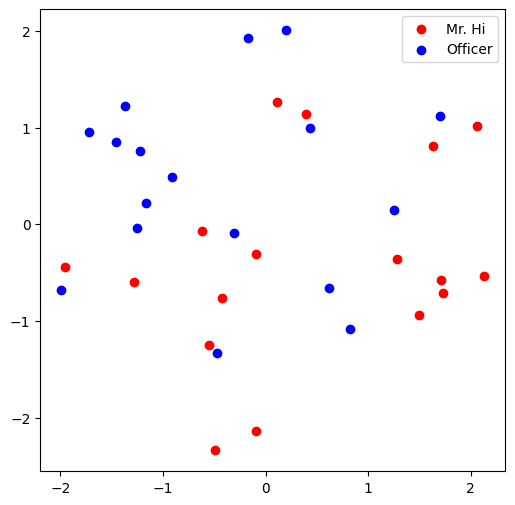

In [124]:
visualize_emb(emb)

In [121]:
from torch.optim import SGD

def accuracy(pred, label):
  # TODO: Implement the accuracy function. This function takes the 
  # pred tensor (the resulting tensor after sigmoid) and the label 
  # tensor (torch.LongTensor). Predicted value greater than 0.5 will 
  # be classified as label 1. Else it will be classified as label 0.
  # The returned accuracy should be rounded to 4 decimal places. 
  # For example, accuracy 0.82956 will be rounded to 0.8296.

  accu = 0.0

  ############# Your code here ############
  pred = (pred > 0.5).type(torch.LongTensor)
  accu = float(torch.sum(pred==label)/pred.shape[0])
  accu = round(accu, 4)
  #########################################

  return accu

def train(emb, loss_fn, sigmoid, train_label, train_edge):
  # TODO: Train the embedding layer here. You can also change epochs and 
  # learning rate. In general, you need to implement: 
  # (1) Get the embeddings of the nodes in train_edge
  # (2) Dot product the embeddings between each node pair
  # (3) Feed the dot product result into sigmoid
  # (4) Feed the sigmoid output into the loss_fn
  # (5) Print both loss and accuracy of each epoch 
  # (as a sanity check, the loss should decrease during training)

  epochs = 500
  learning_rate = 1

  optimizer = SGD(emb.parameters(), lr=learning_rate, momentum=0.9)

  for i in range(epochs):

    ############# Your code here ############
    #(1)
    embeddings = emb(train_edge) #train_edge is of shape (2, x) and so this generates (2, x, H) dimensional embeddings
    #(2)
    dot = torch.sum(embeddings[0]*embeddings[1], axis=-1)
    #(3)
    sig = sigmoid(dot)
    #(4)
    loss = loss_fn(sig, train_label)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    #(5)
    print(f"Epoch:{i+1}, Loss:{loss.item():.4f}, Accuracy:{accuracy(sig, train_label)}")
    #########################################

loss_fn = nn.BCELoss()
sigmoid = nn.Sigmoid()

# Generate the positive and negative labels
pos_label = torch.ones(pos_edge_index.shape[1], )
neg_label = torch.zeros(neg_edge_index.shape[1], )

# Concat positive and negative labels into one tensor
train_label = torch.cat([pos_label, neg_label], dim=0)

# Concat positive and negative edges into one tensor
# Since the network is very small, we do not split the edges into val/test sets
train_edge = torch.cat([pos_edge_index, neg_edge_index], dim=1)
emb = create_node_emb()
train(emb, loss_fn, sigmoid, train_label, train_edge)

Epoch:1, Loss:2.0830, Accuracy:0.5
Epoch:2, Loss:1.9483, Accuracy:0.5
Epoch:3, Loss:1.7127, Accuracy:0.5
Epoch:4, Loss:1.4227, Accuracy:0.5
Epoch:5, Loss:1.1307, Accuracy:0.5
Epoch:6, Loss:0.8835, Accuracy:0.5064
Epoch:7, Loss:0.7076, Accuracy:0.5256
Epoch:8, Loss:0.6022, Accuracy:0.6538
Epoch:9, Loss:0.5502, Accuracy:0.7564
Epoch:10, Loss:0.5318, Accuracy:0.7949
Epoch:11, Loss:0.5317, Accuracy:0.7821
Epoch:12, Loss:0.5396, Accuracy:0.7692
Epoch:13, Loss:0.5486, Accuracy:0.7628
Epoch:14, Loss:0.5536, Accuracy:0.7628
Epoch:15, Loss:0.5512, Accuracy:0.7564
Epoch:16, Loss:0.5395, Accuracy:0.7692
Epoch:17, Loss:0.5179, Accuracy:0.7821
Epoch:18, Loss:0.4878, Accuracy:0.7885
Epoch:19, Loss:0.4513, Accuracy:0.8205
Epoch:20, Loss:0.4113, Accuracy:0.8526
Epoch:21, Loss:0.3706, Accuracy:0.8782
Epoch:22, Loss:0.3316, Accuracy:0.8974
Epoch:23, Loss:0.2957, Accuracy:0.9295
Epoch:24, Loss:0.2636, Accuracy:0.9487
Epoch:25, Loss:0.2353, Accuracy:0.9679
Epoch:26, Loss:0.2104, Accuracy:0.9808
Epoch:27, 

Embedding shape:  (34, 16)


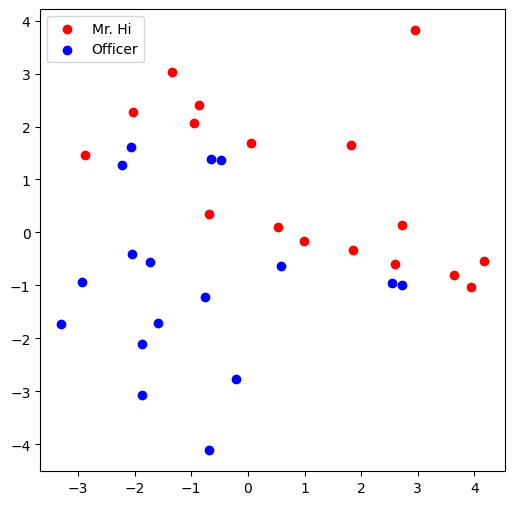

In [122]:
visualize_emb(emb)